In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Generating the Data

In [162]:
def randomData(samples_per_class = 1000, noise_features = 0):
    class1 = np.random.multivariate_normal(mean = [1.5,1.5], cov = np.identity(2), size = samples_per_class)
    class2 = np.random.multivariate_normal(mean = [-1.5,1.5], cov = np.identity(2), size = samples_per_class)
    class3 = np.random.multivariate_normal(mean = [0,(1-np.sqrt(3))*1.5], cov = np.identity(2), size = samples_per_class) 
    
    if noise_features > 0:
        noiseX = np.random.uniform(low = -1, high = 1, size = [3*samples_per_class, noise_features])
        X = np.concatenate([class1, class2, class3], axis = 0)
        X = np.concatenate([X, noiseX], axis = 1)
    else:
        X = np.concatenate([class1, class2, class3], axis = 0)
    
    y = [0] * samples_per_class + [1] * samples_per_class + [2] * samples_per_class

    return X, y

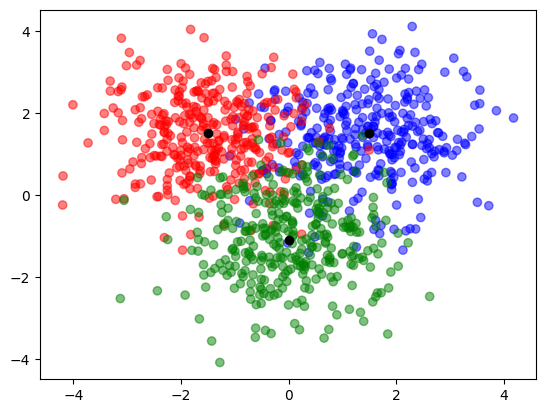

In [172]:
colors = {0: "blue", 1: "red", 2: "green" }
x, y = randomData(samples_per_class = 333)

x_center = [1.5, -1.5, 0]
y_center = [1.5, 1.5, 1.5*(1-np.sqrt(3))]

plt.scatter(x=x[:,0], y=x[:,1], c=[colors[label] for label in y], alpha=0.5)
plt.scatter(x=x_center, y=y_center, c= "black")
plt.show()

## Adding Noise with 1NN

In [164]:
random_dimensions = np.logspace(start = 1, stop = 4, dtype = int)
knn = KNeighborsClassifier(n_neighbors=1, weights = "distance", n_jobs=-1)
accuracies = []

for dim in tqdm(random_dimensions):
    X_test, y_test = randomData(samples_per_class=333, noise_features=dim)
    X_train, y_train = randomData(samples_per_class=333, noise_features=dim)
    accuracy = 0
    for _ in range(25):        
        knn.fit(X_train,y_train)
        predictions= knn.predict(X_test)
        accuracy += accuracy_score(predictions,y_test)
    accuracies.append(accuracy/25)

100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


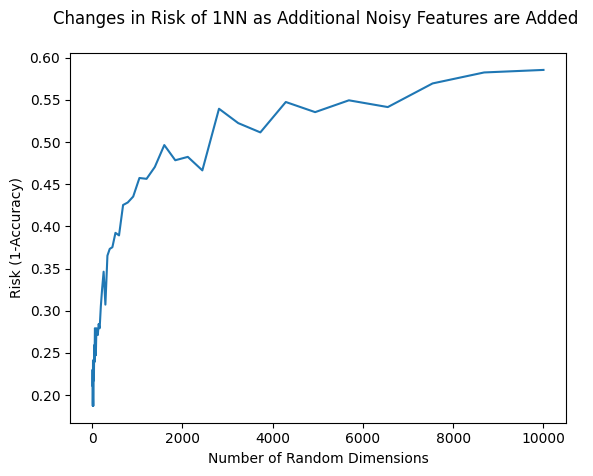

In [189]:
plt.plot(random_dimensions,[1-i for i in accuracies])
plt.title("Changes in Risk of 1NN as Additional Noisy Features are Added \n")
plt.xlabel("Number of Random Dimensions")
plt.ylabel("Risk (1-Accuracy)")
#plt.ylim(0.1,0.7)
plt.show()

## Can we remedy this with sample size?

In [166]:
sample_sizes = np.logspace(start = np.log10(300), stop = np.log10(10000), dtype = int)
samples_accuracies = []

for samples in tqdm(sample_sizes):
    X_test, y_test = randomData(samples_per_class=samples, noise_features = 4000)
    X_train, y_train = randomData(samples_per_class=333, noise_features = 4000)
    accuracy = 0
    for _ in range(25):        
        knn.fit(X_train,y_train)
        predictions= knn.predict(X_test)
        accuracy += accuracy_score(predictions,y_test)
    samples_accuracies.append(accuracy/25)

100%|██████████| 50/50 [07:25<00:00,  8.92s/it]


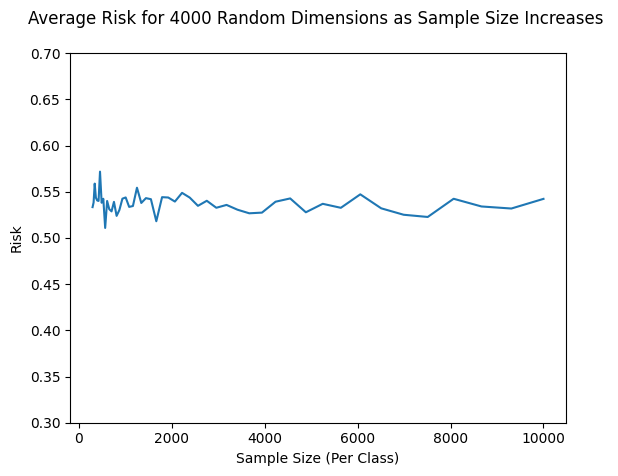

In [193]:
plt.plot(sample_sizes,[1-i for i in samples_accuracies])
plt.title("Average Risk for 4000 Random Dimensions as Sample Size Increases \n")
plt.ylabel("Risk")
plt.xlabel("Sample Size (Per Class)")
plt.ylim(0.3, 0.7)
plt.show()